In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [2]:
dataset = pd.read_csv('titanic.csv')
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [16]:
fare_values = dataset['Fare'].values
fare_values.shape

(891,)

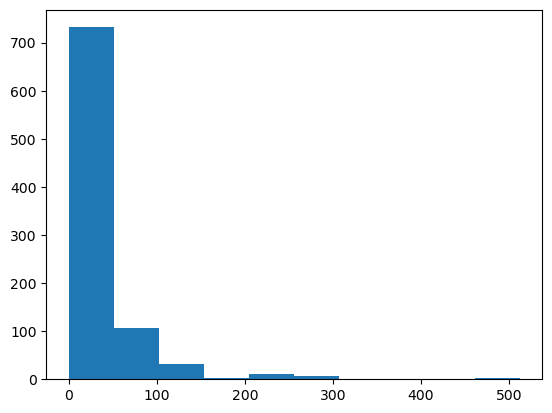

In [7]:
plt.hist(fare_values, bins=10)
plt.show()

In [9]:
#średnia
mean_fare = np.round(np.mean(fare_values))
mean_fare

32.0

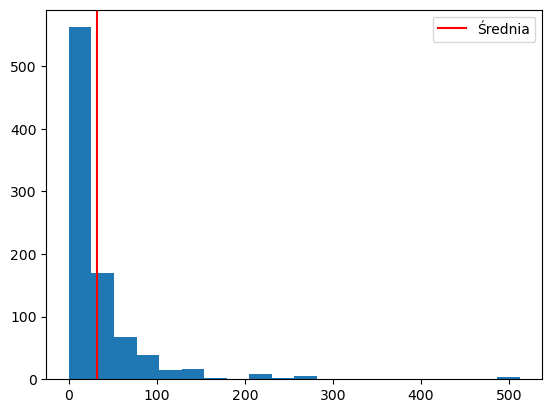

In [10]:
plt.hist(fare_values, bins=20)
plt.axvline(x = mean_fare, color='red', label = 'Średnia')
plt.legend(loc='upper right')
plt.show()

In [17]:
#mediana
median_fare = np.round(np.median(fare_values))
median_fare

14.0

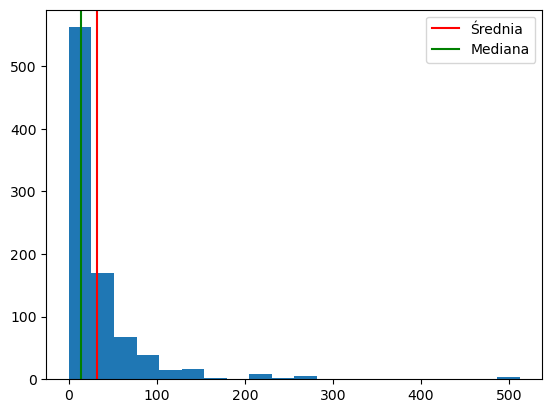

In [18]:
plt.hist(fare_values, bins=20)
plt.axvline(x = mean_fare, color='red', label = 'Średnia')
plt.axvline(x = median_fare, color='green', label = 'Mediana')
plt.legend(loc='upper right')
plt.show()

In [19]:
#moda
mode_fare = stats.mode(fare_values)
mode_fare 

ModeResult(mode=8.05, count=43)

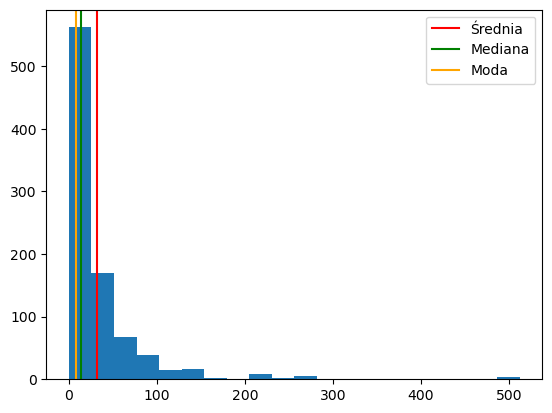

In [20]:
plt.hist(fare_values, bins=20)
plt.axvline(x = mean_fare, color='red', label = 'Średnia')
plt.axvline(x = median_fare, color='green', label = 'Mediana')
plt.axvline(x = mode_fare[0], color='orange', label = 'Moda')
plt.legend(loc='upper right')
plt.show()

In [21]:
#kwartyle
q0 = np.quantile(fare_values, 0.0)
q1 = np.round(np.quantile(fare_values, 0.25))
q3 = np.round(np.quantile(fare_values, 0.75))
q4 = np.round(np.quantile(fare_values, 1.0))
print(f'Q0: {q0}')
print(f'Q1: {q1}')
print(f'Q2: {median_fare}')
print(f'Q3: {q3}')
print(f'Q4: {q4}')

Q0: 0.0
Q1: 8.0
Q2: 14.0
Q3: 31.0
Q4: 512.0


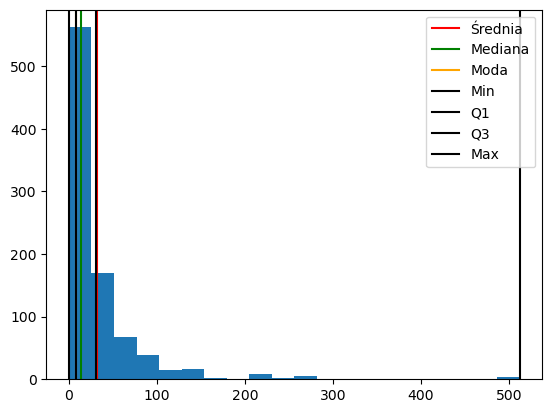

In [22]:
plt.hist(fare_values, bins=20)
plt.axvline(x = mean_fare, color='red', label = 'Średnia')
plt.axvline(x = median_fare, color='green', label = 'Mediana')
plt.axvline(x = mode_fare[0], color='orange', label = 'Moda')
plt.axvline(x = q0, color='black', label = 'Min')
plt.axvline(x = q1, color='black', label = 'Q1')
plt.axvline(x = q3, color='black', label = 'Q3')
plt.axvline(x = q4, color='black', label = 'Max')
plt.legend(loc='upper right')
plt.show()

In [24]:
#zakres
range_fare =np.round(max(fare_values) - min(fare_values))
print(range_fare)

512.0


In [25]:
#rozstęp międzykwartylowy - IQR (InterQuartile Range)
iqr = q3 - q1
print(iqr)

23.0


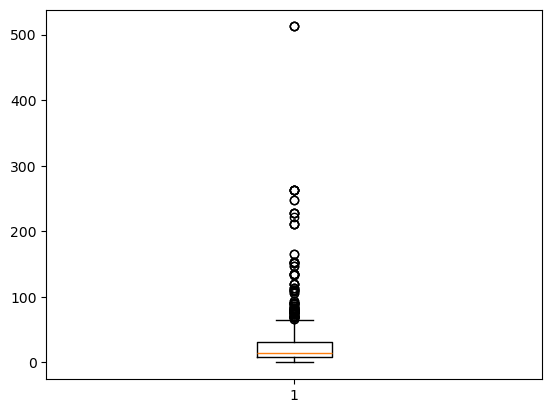

In [26]:
plt.boxplot(fare_values)
plt.show()

In [27]:
#wariancja
variance_fare = np.var(fare_values, ddof=1)
print(variance_fare)

2469.436845743116


In [28]:
#odchylenie standardowe
standard_deviation_fare = np.std(fare_values, ddof=1)
print(standard_deviation_fare)

49.6934285971809


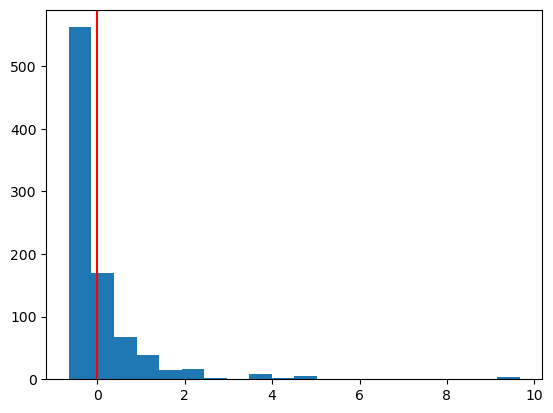

Średnia: 3.987332972840069e-18
Odchylenie standardowe: 1.0005616400330457


In [29]:
#standaryzacja
scaler_standardized = StandardScaler()
standardized_fare_values = scaler_standardized.fit_transform(fare_values.reshape(-1, 1))
plt.hist(standardized_fare_values, bins=20)
plt.axvline(x = standardized_fare_values.mean(), color='red', label = 'Średnia')
plt.show()
print(f'Średnia: {standardized_fare_values.mean()}')
print(f'Odchylenie standardowe: {np.std(standardized_fare_values, ddof=1)}')

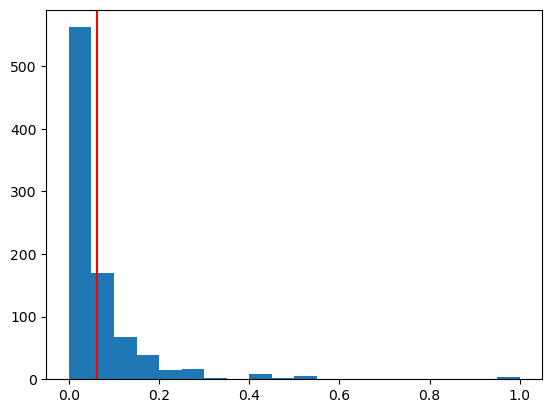

Średnia: 0.06285842768394742
Odchylenie standardowe: 0.09699511290236998


In [30]:
# Min Max Scaler
scaler_MinMax = MinMaxScaler()
normalized_fare_values = scaler_MinMax.fit_transform(fare_values.reshape(-1, 1))
plt.hist(normalized_fare_values, bins=20)
plt.axvline(x = normalized_fare_values.mean(), color='red', label = 'Średnia')
plt.show()
print(f'Średnia: {normalized_fare_values.mean()}')
print(f'Odchylenie standardowe: {np.std(normalized_fare_values, ddof=1)}')

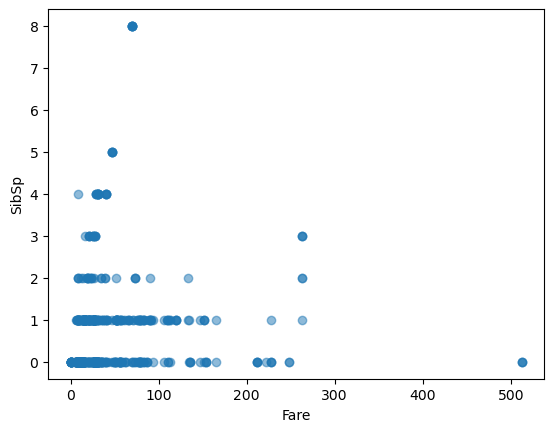

In [37]:
#korelacja
sibsb_values = dataset['SibSp'].values
plt.scatter(x=fare_values, y=sibsb_values, alpha=0.5)
plt.xlabel('Fare')
plt.ylabel('SibSp')
plt.show()

In [38]:
stats.pearsonr(fare_values, sibsb_values)

PearsonRResult(statistic=0.15965104324216067, pvalue=1.671255768470037e-06)

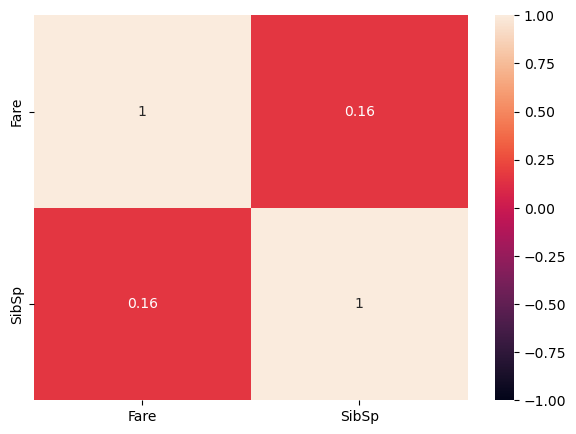

In [42]:
plt.figure(figsize=(7, 5))
sns.heatmap(dataset[['Fare', 'SibSp']].corr(), vmin=-1, vmax=1, annot=True)
plt.show()